In [13]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [15]:
df1 = pd.read_csv('Bengaluru_House_Data.csv')

In [16]:
df1[:10]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [17]:
df1.shape

(13320, 9)

In [18]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [19]:
df2 = df1.drop(['area_type','balcony','society','availability'] , axis='columns')

In [20]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [21]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [22]:
df3 = df2.dropna()

In [23]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [24]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [25]:
df3['bhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))

/var/folders/jj/4hp7g8wx2b1265fbdy_99qcc0000gn/T/ipykernel_2246/3847263516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))


In [26]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [27]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [28]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [29]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

In [30]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [31]:
df4 = df3[~df3['total_sqft'].apply(is_float)]

In [32]:
df4[:10]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [33]:
def convert(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [34]:
df4 = df3.copy()

In [35]:
df4['total_sqft'] = df4['total_sqft'].apply(convert)

In [36]:
df4['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ], shape=(1973,))

In [37]:
df5 = df4.copy()

In [38]:
df5['price_per_sqft'] = round(df5['price']*100000/df5['total_sqft'],2)

In [39]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00


In [40]:
df5['location'] = df5['location'].apply(lambda x : x.strip())

In [41]:
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [42]:
location_stats.head()

location
Whitefield         535
Sarjapur  Road     392
Electronic City    304
Kanakpura Road     266
Thanisandra        236
Name: location, dtype: int64

In [43]:
location_stats_10 = location_stats[location_stats<=10]
len(location_stats_10)

1052

In [44]:
df5.location = df5.location.apply(lambda x : 'other' if x in location_stats_10 else x)

In [45]:
len(df5.location.unique())

242

In [46]:
df5[df5.total_sqft/df5.bhk < 300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.51
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.33
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.98
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.30
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.00
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.43
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.33
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.91
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.93


In [47]:
df6 = df5[df5.total_sqft / df5.bhk >= 300]
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00


In [48]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502836
std        4168.127366
min         267.830000
25%        4210.530000
50%        5294.120000
75%        6916.670000
max      176470.590000
Name: price_per_sqft, dtype: float64

In [49]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby("location"):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        rem_df = subdf[(subdf.price_per_sqft >= (m-st)) & (subdf.price_per_sqft <= (m+st))] 
        df_out = pd.concat([df_out,rem_df],ignore_index=True)
    return df_out

In [50]:
df7 = remove_outliers(df6)
df7.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000
mean,1503.877034,2.474075,90.982730,2.572210,5657.702574
std,876.716232,0.981338,86.147549,0.896219,2266.477027
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1108.000000,2.000000,49.000000,2.000000,4244.760000
50%,1282.000000,2.000000,67.000000,2.000000,5172.410000
75%,1650.000000,3.000000,100.000000,3.000000,6426.100000
max,30400.000000,16.000000,2200.000000,16.000000,24509.800000


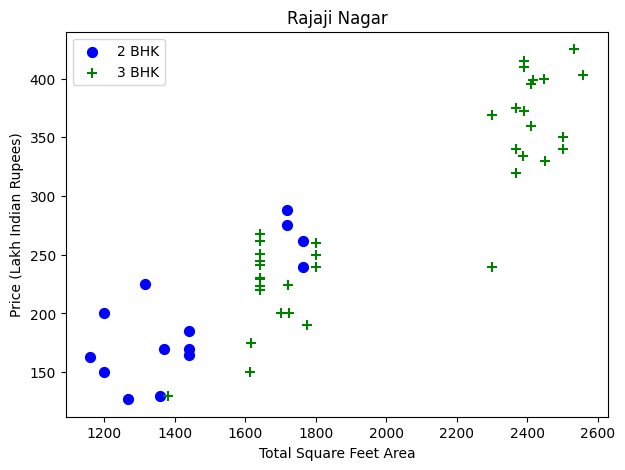

In [51]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (7,5)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

In [52]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7329, 7)

In [53]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [54]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.03
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.57
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.03
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.90


In [55]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [56]:
 # we now drop price per sqft and the size features as they were just for outlier detection

In [57]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [75]:
dummies = pd.get_dummies(df10.location, dtype=int)
dummies.head()


,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df11 = pd.concat([df10,dummies],axis ='columns')
df11.shape

(7251, 247)

In [60]:
df12 = df11.drop("location",axis="columns")
df12.head()
df12.shape

(7251, 246)

In [61]:
X = df12.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [65]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8452277697873559

In [66]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [67]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                #'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
            'criterion' : ['squared_error','friedman_mse'],
            'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.818354,{}
1,lasso,0.699286,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.792374,"{'criterion': 'squared_error', 'splitter': 'ra..."


In [68]:
df12.columns

Index(['total_sqft', 'bath', 'price', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=246)

In [69]:
def get_price(location,sqft,bath,bedroom):
    location_ind = np.where(X.columns == location)[0][0]

    x  = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bedroom

    if location_ind > 0:
        x[location_ind] = 1
    
    return lr_clf.predict([x])[0]

In [70]:
get_price('1st Phase JP Nagar',1000,2,2)

/Users/praneeth/ML/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(83.49904676990269)

In [71]:
import pickle
with open('Price_Prediction_Model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [72]:
import json 
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))